<a href="https://colab.research.google.com/github/bernaldiaz/bernaldiaz/blob/main/pendulo_invertido_animacion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

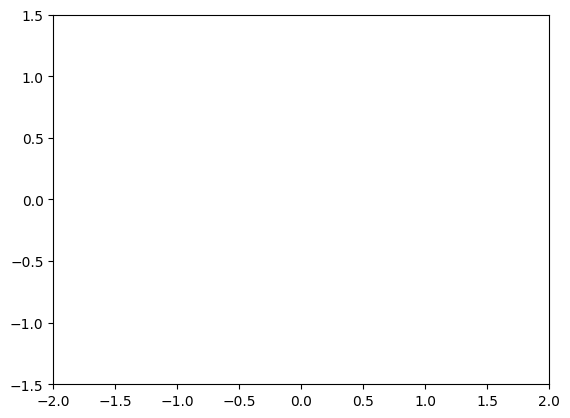

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Parámetros del sistema
length = 1.0   # Longitud del péndulo (en metros)
g = 9.81       # Aceleración debida a la gravedad (m/s^2)
dt = 0.05      # Paso de tiempo (s)
car_position = 0.0   # Posición inicial del carrito (en metros)
car_velocity = 0.0   # Velocidad inicial del carrito (en m/s)
theta = np.pi - 0.1  # Ángulo inicial del péndulo (cerca de la posición invertida)
theta_dot = 0.0      # Velocidad angular inicial del péndulo (rad/s)

# Controlador simple para el péndulo invertido
def control(theta, theta_dot):
    Kp = 100.0  # Ganancia proporcional
    Kd = 20.0   # Ganancia derivativa
    force = -Kp * (theta - np.pi) - Kd * theta_dot
    return force

# Ecuaciones del movimiento
def update_system(car_position, car_velocity, theta, theta_dot, dt):
    force = control(theta, theta_dot)

    # Dinámica del carrito
    car_acceleration = force
    car_velocity += car_acceleration * dt
    car_position += car_velocity * dt

    # Dinámica del péndulo (ecuaciones simplificadas)
    theta_acceleration = (g / length) * np.sin(theta) - (force * np.cos(theta)) / length
    theta_dot += theta_acceleration * dt
    theta += theta_dot * dt

    return car_position, car_velocity, theta, theta_dot

# Configuración de la figura y los ejes
fig, ax = plt.subplots()
ax.set_xlim(-2, 2)
ax.set_ylim(-1.5, 1.5)

cart, = ax.plot([], [], 'ks-', lw=10)   # Representación del carrito
pendulum_line, = ax.plot([], [], 'o-', lw=2)  # Representación del péndulo

# Función para inicializar el gráfico
def init():
    cart.set_data([], [])
    pendulum_line.set_data([], [])
    return cart, pendulum_line

# Función para actualizar la animación en cada frame
def update_plot(frame):
    global car_position, car_velocity, theta, theta_dot

    # Actualizar la dinámica del sistema
    car_position, car_velocity, theta, theta_dot = update_system(car_position, car_velocity, theta, theta_dot, dt)

    # Posición del carrito
    cart.set_data([car_position - 0.1, car_position + 0.1], [0, 0])

    # Posición del péndulo
    x_pendulum = car_position + length * np.sin(theta)
    y_pendulum = -length * np.cos(theta)
    pendulum_line.set_data([car_position, x_pendulum], [0, y_pendulum])

    return cart, pendulum_line

# Crear los frames para la animación
frame_amount = np.arange(0, 10, dt)  # 10 segundos de animación

# Crear la animación
pendulum_ani = animation.FuncAnimation(fig, update_plot, frames=frame_amount,
                                       init_func=init, interval=dt*1000, blit=True)

# Mostrar la animación en Google Colab
HTML(pendulum_ani.to_jshtml())
